# Multiple Linear Regression using the Ordinary Least Squares (OLS)

                            OLS Regression Results                            
Dep. Variable:         Execution_time   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.200e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:39:13   Log-Likelihood:                -823.79
No. Observations:                 425   AIC:                             1656.
Df Residuals:                     421   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

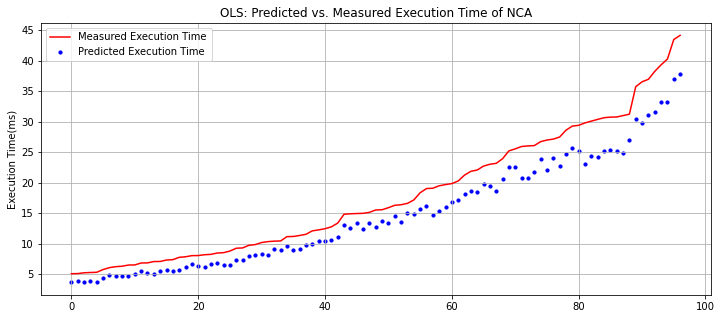

In [7]:
from time import time
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# df = pd.read_csv("training_data+valid_data.csv")
# x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']

# df = pd.read_csv("training_data.csv")
# x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = df['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']


# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


df = pd.read_csv("training_data.csv")
x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
y_train = df['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
y_test = df_pred['Execution_time']


# df = pd.read_csv("training_data.csv")
# x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = df['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']

# df = pd.read_csv("training_data.csv")
# x_train = df[["Total_number_of_FLOPs"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs"]] 
# y_test = df_pred['Execution_time']

x_train = sm.add_constant(x_train)
start = time()
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()
print(olsres.summary())
stop = time()
training_time = stop-start
# predict on validation data
x_valid = sm.add_constant(x_valid)
y_valid_pred = olsres.predict(x_valid)

# Calculate percentage error
per_err = (y_valid - y_valid_pred) / y_valid

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE_valid = sum(per_err)/len(per_err)



x_test = sm.add_constant(x_test)
start = time()
y_pred = olsres.predict(x_test)
stop = time()
prediction_time = stop-start

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE_test = sum(per_err)/len(per_err)
  
# Print the MAPE value 
print(f'''
MAPE during training of OLS : { round(MAPE_valid, 2) }
MAPE during testing of OLS  : { round(MAPE_test, 2) }
training time : {training_time}
prediction time:{prediction_time}

''')

index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("OLS: Predicted vs. Measured Execution Time of NCA")
plt.show()

# Multi-Layer Perceptrons (MLP)

# The numerber of hidden layer: 0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
17/17 [==============================] - 0s 593us/step - loss: 952.5085
Epoch 2/200
17/17 [==============================] - 0s 538us/step - loss: 496.7056
Epoch 3/200
17/17 [==============================] - 0s 505us/step - loss: 266.5663
Epoch 4/200
17/17 [==============================] - 0s 452us/step - loss: 149.2451
Epoch 5/200
17/17 [==============================] - 0s 472us/step - loss: 92.1497
Epoch 6/200
17/17 [==============================] - 0s 475us/step - loss: 63.6268
Epoch 7/200
17/17 [==============================] - 0s 486us/step - loss: 49.1512
Epoch 8/200
17/17 [==============================] - 0s 524us/step - 

17/17 [==============================] - 0s 984us/step - loss: 34.3121
Epoch 189/200
17/17 [==============================] - 0s 1ms/step - loss: 34.3244
Epoch 190/200
17/17 [==============================] - 0s 996us/step - loss: 34.3115
Epoch 191/200
17/17 [==============================] - 0s 980us/step - loss: 34.3098
Epoch 192/200
17/17 [==============================] - 0s 950us/step - loss: 34.3512
Epoch 193/200
17/17 [==============================] - 0s 1ms/step - loss: 34.3400
Epoch 194/200
17/17 [==============================] - 0s 947us/step - loss: 34.3241
Epoch 195/200
17/17 [==============================] - 0s 1ms/step - loss: 34.3254
Epoch 196/200
17/17 [==============================] - 0s 926us/step - loss: 34.3171
Epoch 197/200
17/17 [==============================] - 0s 990us/step - loss: 34.3213
Epoch 198/200
17/17 [==============================] - 0s 951us/step - loss: 34.3239
Epoch 199/200
17/17 [==============================] - 0s 969us/step - loss: 34.3110


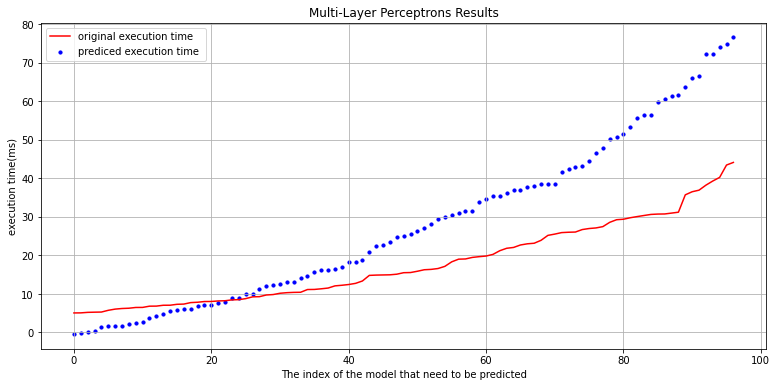

In [9]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt

train = pd.read_csv("training_data+valid_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default

start = time()
    
model = tf.keras.Sequential(
                            tf.keras.layers.Dense(1, input_shape = x_train.shape[1:]))

model.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')
model.summary()
history = model.fit(x_train, y_train, epochs=200)
start = time()

y_pred = model.predict(x_test)
stop = time()
prediction_time = stop-start
y_test  = np.array(y_test).reshape(-1,1)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test


# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)



MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print(f"""MAPE of MLP  : {round(MAPE, 2)},  

prediction time : {prediction_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
plt.figure(figsize=(13,6))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Multi-Layer Perceptrons Results")
plt.show()

# The numerber of hidden layer: 1

Epoch 1/100
14/14 [==============================] - 0s 606us/step - loss: 762.5260
Epoch 2/100
14/14 [==============================] - 0s 628us/step - loss: 317.7195
Epoch 3/100
14/14 [==============================] - 0s 617us/step - loss: 182.6272
Epoch 4/100
14/14 [==============================] - 0s 590us/step - loss: 127.1091
Epoch 5/100
14/14 [==============================] - 0s 517us/step - loss: 99.1310
Epoch 6/100
14/14 [==============================] - 0s 512us/step - loss: 83.0684
Epoch 7/100
14/14 [==============================] - 0s 513us/step - loss: 72.0130
Epoch 8/100
14/14 [==============================] - 0s 530us/step - loss: 63.8003
Epoch 9/100
14/14 [==============================] - 0s 528us/step - loss: 57.2596
Epoch 10/100
14/14 [==============================] - 0s 543us/step - loss: 52.7747
Epoch 11/100
14/14 [==============================] - 0s 515us/step - loss: 48.6644
Epoch 12/100
14/14 [==============================] - 0s 559us/step - loss: 45.13

14/14 [==============================] - 0s 687us/step - loss: 12.2819
Epoch 96/100
14/14 [==============================] - 0s 693us/step - loss: 12.1425
Epoch 97/100
14/14 [==============================] - 0s 711us/step - loss: 12.1175
Epoch 98/100
14/14 [==============================] - 0s 693us/step - loss: 12.1046
Epoch 99/100
14/14 [==============================] - 0s 727us/step - loss: 12.0793
Epoch 100/100
14/14 [==============================] - 0s 716us/step - loss: 12.0272
Epoch 1/100
14/14 [==============================] - 0s 614us/step - loss: 836.3556
Epoch 2/100
14/14 [==============================] - 0s 605us/step - loss: 272.9007
Epoch 3/100
14/14 [==============================] - 0s 605us/step - loss: 140.0487
Epoch 4/100
14/14 [==============================] - 0s 539us/step - loss: 95.5587
Epoch 5/100
14/14 [==============================] - 0s 545us/step - loss: 74.8646
Epoch 6/100
14/14 [==============================] - 0s 490us/step - loss: 62.4040
Epoch 7

14/14 [==============================] - 0s 793us/step - loss: 11.8159
Epoch 90/100
14/14 [==============================] - 0s 929us/step - loss: 11.8201
Epoch 91/100
14/14 [==============================] - 0s 839us/step - loss: 11.8255
Epoch 92/100
14/14 [==============================] - 0s 817us/step - loss: 11.7760
Epoch 93/100
14/14 [==============================] - 0s 791us/step - loss: 11.7566
Epoch 94/100
14/14 [==============================] - 0s 776us/step - loss: 11.7917
Epoch 95/100
14/14 [==============================] - 0s 818us/step - loss: 11.8566
Epoch 96/100
14/14 [==============================] - 0s 807us/step - loss: 11.5954
Epoch 97/100
14/14 [==============================] - 0s 782us/step - loss: 11.6986
Epoch 98/100
14/14 [==============================] - 0s 777us/step - loss: 11.7230
Epoch 99/100
14/14 [==============================] - 0s 757us/step - loss: 11.7022
Epoch 100/100
14/14 [==============================] - 0s 788us/step - loss: 11.5237
Epoc

14/14 [==============================] - 0s 727us/step - loss: 11.7233
Epoch 84/100
14/14 [==============================] - 0s 710us/step - loss: 11.6594
Epoch 85/100
14/14 [==============================] - 0s 656us/step - loss: 11.7775
Epoch 86/100
14/14 [==============================] - 0s 735us/step - loss: 11.7449
Epoch 87/100
14/14 [==============================] - 0s 686us/step - loss: 11.7798
Epoch 88/100
14/14 [==============================] - 0s 717us/step - loss: 11.6561
Epoch 89/100
14/14 [==============================] - 0s 700us/step - loss: 11.6546
Epoch 90/100
14/14 [==============================] - 0s 727us/step - loss: 11.5516
Epoch 91/100
14/14 [==============================] - 0s 703us/step - loss: 11.6071
Epoch 92/100
14/14 [==============================] - 0s 677us/step - loss: 11.5116
Epoch 93/100
14/14 [==============================] - 0s 696us/step - loss: 11.8952
Epoch 94/100
14/14 [==============================] - 0s 720us/step - loss: 11.4926
Epoch

14/14 [==============================] - 0s 845us/step - loss: 11.7277
Epoch 78/100
14/14 [==============================] - 0s 891us/step - loss: 11.7654
Epoch 79/100
14/14 [==============================] - 0s 903us/step - loss: 11.7270
Epoch 80/100
14/14 [==============================] - 0s 863us/step - loss: 11.5928
Epoch 81/100
14/14 [==============================] - 0s 876us/step - loss: 11.7434
Epoch 82/100
14/14 [==============================] - 0s 873us/step - loss: 11.6966
Epoch 83/100
14/14 [==============================] - 0s 924us/step - loss: 11.6505
Epoch 84/100
14/14 [==============================] - 0s 878us/step - loss: 11.6512
Epoch 85/100
14/14 [==============================] - 0s 1ms/step - loss: 11.6194
Epoch 86/100
14/14 [==============================] - 0s 907us/step - loss: 11.5437
Epoch 87/100
14/14 [==============================] - 0s 858us/step - loss: 11.5794
Epoch 88/100
14/14 [==============================] - 0s 940us/step - loss: 11.4930
Epoch 8

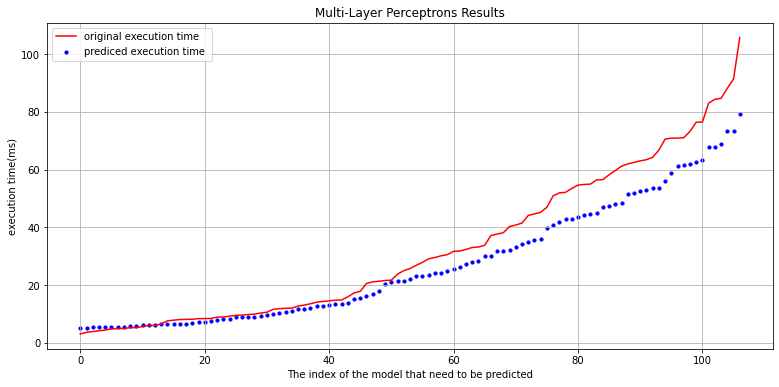

In [16]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt


train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']



scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default
range_neuron_first_layer =range(4,12,1)
start = time()
for num_neuron_first_layer in range_neuron_first_layer:
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                                 
                                tf.keras.layers.Dense(1)])

    model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
    history = model.fit(x_train, y_train, epochs=100)

    y_valid_current = model.predict(x_valid)

    y_valid  = np.array(y_valid).reshape(-1,1)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    if ( MAPE < MAPE_better ):
        better_num_neuron_first_layer = num_neuron_first_layer
        MAPE_better = MAPE
stop = time()
tunning_time = stop-start        
start = time()
model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                                 
                                tf.keras.layers.Dense(1)])
model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
history = model.fit(x_train, y_train, epochs=100)
stop = time()
training_time = stop-start 

y_pred = model.predict(x_valid)

y_test  = np.array(y_valid).reshape(-1,1)
per_err = (y_test - y_pred) / y_test
per_err = abs(per_err)*100
MAPE = sum(per_err)/len(per_err)

MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print(f"""MAPE of MLP  :" , {round(MAPE, 2)},  
the number of neurons of fist layer :{ better_num_neuron_first_layer },
Tunning time : {tunning_time}s,
Training time : {training_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
plt.figure(figsize=(13,6))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Multi-Layer Perceptrons Results")
plt.show()

# The numerber of hidden layer: 2

Epoch 1/200
17/17 [==============================] - 0s 626us/step - loss: 725.4844
Epoch 2/200
17/17 [==============================] - 0s 537us/step - loss: 230.8940
Epoch 3/200
17/17 [==============================] - 0s 555us/step - loss: 131.3340
Epoch 4/200
17/17 [==============================] - 0s 492us/step - loss: 95.1251
Epoch 5/200
17/17 [==============================] - 0s 544us/step - loss: 75.2760
Epoch 6/200
17/17 [==============================] - 0s 505us/step - loss: 68.5915
Epoch 7/200
17/17 [==============================] - 0s 534us/step - loss: 63.8815
Epoch 8/200
17/17 [==============================] - 0s 525us/step - loss: 54.3018
Epoch 9/200
17/17 [==============================] - 0s 526us/step - loss: 54.1624
Epoch 10/200
17/17 [==============================] - 0s 545us/step - loss: 50.5885
Epoch 11/200
17/17 [==============================] - 0s 542us/step - loss: 48.5163
Epoch 12/200
17/17 [==============================] - 0s 544us/step - loss: 51.843

17/17 [==============================] - 0s 759us/step - loss: 35.6115
Epoch 195/200
17/17 [==============================] - 0s 766us/step - loss: 35.1148
Epoch 196/200
17/17 [==============================] - 0s 756us/step - loss: 34.7794
Epoch 197/200
17/17 [==============================] - 0s 778us/step - loss: 35.2014
Epoch 198/200
17/17 [==============================] - 0s 740us/step - loss: 33.9236
Epoch 199/200
17/17 [==============================] - 0s 802us/step - loss: 34.6168
Epoch 200/200
17/17 [==============================] - 0s 780us/step - loss: 34.6517
Epoch 1/200
17/17 [==============================] - 0s 584us/step - loss: 742.6863
Epoch 2/200
17/17 [==============================] - 0s 575us/step - loss: 220.2638
Epoch 3/200
17/17 [==============================] - 0s 584us/step - loss: 119.6106
Epoch 4/200
17/17 [==============================] - 0s 529us/step - loss: 90.2752
Epoch 5/200
17/17 [==============================] - 0s 483us/step - loss: 77.8414
E

17/17 [==============================] - 0s 684us/step - loss: 34.2762
Epoch 188/200
17/17 [==============================] - 0s 658us/step - loss: 34.7176
Epoch 189/200
17/17 [==============================] - 0s 692us/step - loss: 35.5314
Epoch 190/200
17/17 [==============================] - 0s 742us/step - loss: 34.3398
Epoch 191/200
17/17 [==============================] - 0s 762us/step - loss: 33.9244
Epoch 192/200
17/17 [==============================] - 0s 716us/step - loss: 34.2204
Epoch 193/200
17/17 [==============================] - 0s 726us/step - loss: 36.9539
Epoch 194/200
17/17 [==============================] - 0s 679us/step - loss: 35.0028
Epoch 195/200
17/17 [==============================] - 0s 714us/step - loss: 34.4978
Epoch 196/200
17/17 [==============================] - 0s 727us/step - loss: 34.5742
Epoch 197/200
17/17 [==============================] - 0s 696us/step - loss: 33.9155
Epoch 198/200
17/17 [==============================] - 0s 725us/step - loss: 35

17/17 [==============================] - 0s 1ms/step - loss: 35.8048
Epoch 181/200
17/17 [==============================] - 0s 901us/step - loss: 34.4362
Epoch 182/200
17/17 [==============================] - 0s 895us/step - loss: 35.9812
Epoch 183/200
17/17 [==============================] - 0s 846us/step - loss: 33.9646
Epoch 184/200
17/17 [==============================] - 0s 879us/step - loss: 37.6632
Epoch 185/200
17/17 [==============================] - 0s 901us/step - loss: 36.0652
Epoch 186/200
17/17 [==============================] - 0s 920us/step - loss: 36.0989
Epoch 187/200
17/17 [==============================] - 0s 901us/step - loss: 39.8614
Epoch 188/200
17/17 [==============================] - 0s 891us/step - loss: 35.9472
Epoch 189/200
17/17 [==============================] - 0s 911us/step - loss: 33.5710
Epoch 190/200
17/17 [==============================] - 0s 872us/step - loss: 35.4955
Epoch 191/200
17/17 [==============================] - 0s 897us/step - loss: 36.1

17/17 [==============================] - 0s 806us/step - loss: 34.3545
Epoch 174/200
17/17 [==============================] - 0s 763us/step - loss: 34.9357
Epoch 175/200
17/17 [==============================] - 0s 755us/step - loss: 36.5696
Epoch 176/200
17/17 [==============================] - 0s 805us/step - loss: 35.1182
Epoch 177/200
17/17 [==============================] - 0s 782us/step - loss: 36.2364
Epoch 178/200
17/17 [==============================] - 0s 790us/step - loss: 34.6067
Epoch 179/200
17/17 [==============================] - 0s 770us/step - loss: 34.9259
Epoch 180/200
17/17 [==============================] - 0s 763us/step - loss: 36.3766
Epoch 181/200
17/17 [==============================] - 0s 808us/step - loss: 34.7674
Epoch 182/200
17/17 [==============================] - 0s 756us/step - loss: 33.9733
Epoch 183/200
17/17 [==============================] - 0s 785us/step - loss: 35.7195
Epoch 184/200
17/17 [==============================] - 0s 807us/step - loss: 34

17/17 [==============================] - 0s 790us/step - loss: 35.1446
Epoch 167/200
17/17 [==============================] - 0s 789us/step - loss: 36.4471
Epoch 168/200
17/17 [==============================] - 0s 778us/step - loss: 34.6603
Epoch 169/200
17/17 [==============================] - 0s 767us/step - loss: 33.9186
Epoch 170/200
17/17 [==============================] - 0s 796us/step - loss: 34.3892
Epoch 171/200
17/17 [==============================] - 0s 815us/step - loss: 34.4230
Epoch 172/200
17/17 [==============================] - 0s 794us/step - loss: 36.0641
Epoch 173/200
17/17 [==============================] - 0s 792us/step - loss: 34.6583
Epoch 174/200
17/17 [==============================] - 0s 780us/step - loss: 33.1296
Epoch 175/200
17/17 [==============================] - 0s 789us/step - loss: 36.1343
Epoch 176/200
17/17 [==============================] - 0s 742us/step - loss: 35.7126
Epoch 177/200
17/17 [==============================] - 0s 786us/step - loss: 35

Epoch 160/200
17/17 [==============================] - 0s 771us/step - loss: 35.8491
Epoch 161/200
17/17 [==============================] - 0s 861us/step - loss: 33.3187
Epoch 162/200
17/17 [==============================] - 0s 784us/step - loss: 33.7741
Epoch 163/200
17/17 [==============================] - 0s 795us/step - loss: 34.5140
Epoch 164/200
17/17 [==============================] - 0s 808us/step - loss: 37.3356
Epoch 165/200
17/17 [==============================] - 0s 800us/step - loss: 33.9187
Epoch 166/200
17/17 [==============================] - 0s 815us/step - loss: 34.1753
Epoch 167/200
17/17 [==============================] - 0s 836us/step - loss: 33.9874
Epoch 168/200
17/17 [==============================] - 0s 849us/step - loss: 35.2390
Epoch 169/200
17/17 [==============================] - 0s 800us/step - loss: 35.5702
Epoch 170/200
17/17 [==============================] - 0s 823us/step - loss: 34.4135
Epoch 171/200
17/17 [==============================] - 0s 770us/s

17/17 [==============================] - 0s 699us/step - loss: 42.5984
Epoch 58/200
17/17 [==============================] - 0s 738us/step - loss: 42.4853
Epoch 59/200
17/17 [==============================] - 0s 692us/step - loss: 45.5109
Epoch 60/200
17/17 [==============================] - 0s 723us/step - loss: 44.6843
Epoch 61/200
17/17 [==============================] - 0s 714us/step - loss: 43.5805
Epoch 62/200
17/17 [==============================] - 0s 693us/step - loss: 41.1737
Epoch 63/200
17/17 [==============================] - 0s 755us/step - loss: 40.8417
Epoch 64/200
17/17 [==============================] - 0s 746us/step - loss: 49.4538
Epoch 65/200
17/17 [==============================] - 0s 707us/step - loss: 40.3845
Epoch 66/200
17/17 [==============================] - 0s 712us/step - loss: 43.5033
Epoch 67/200
17/17 [==============================] - 0s 726us/step - loss: 44.5003
Epoch 68/200
17/17 [==============================] - 0s 705us/step - loss: 41.0216
Epoch

17/17 [==============================] - 0s 722us/step - loss: 37.6417
Epoch 155/200
17/17 [==============================] - 0s 747us/step - loss: 41.0233
Epoch 156/200
17/17 [==============================] - 0s 712us/step - loss: 37.5788
Epoch 157/200
17/17 [==============================] - 0s 687us/step - loss: 39.1749
Epoch 158/200
17/17 [==============================] - 0s 705us/step - loss: 37.2368
Epoch 159/200
17/17 [==============================] - 0s 699us/step - loss: 39.4175
Epoch 160/200
17/17 [==============================] - 0s 739us/step - loss: 38.2421
Epoch 161/200
17/17 [==============================] - 0s 714us/step - loss: 39.5959
Epoch 162/200
17/17 [==============================] - 0s 679us/step - loss: 39.1043
Epoch 163/200
17/17 [==============================] - 0s 709us/step - loss: 40.3760
Epoch 164/200
17/17 [==============================] - 0s 709us/step - loss: 42.6687
Epoch 165/200
17/17 [==============================] - 0s 690us/step - loss: 39

17/17 [==============================] - 0s 929us/step - loss: 41.9783
Epoch 149/200
17/17 [==============================] - 0s 836us/step - loss: 41.4566
Epoch 150/200
17/17 [==============================] - 0s 868us/step - loss: 38.0744
Epoch 151/200
17/17 [==============================] - 0s 877us/step - loss: 40.8742
Epoch 152/200
17/17 [==============================] - 0s 934us/step - loss: 38.6742
Epoch 153/200
17/17 [==============================] - 0s 888us/step - loss: 47.1219
Epoch 154/200
17/17 [==============================] - 0s 889us/step - loss: 36.7012
Epoch 155/200
17/17 [==============================] - 0s 901us/step - loss: 38.4011
Epoch 156/200
17/17 [==============================] - 0s 895us/step - loss: 40.2657
Epoch 157/200
17/17 [==============================] - 0s 892us/step - loss: 40.9734
Epoch 158/200
17/17 [==============================] - 0s 886us/step - loss: 41.4516
Epoch 159/200
17/17 [==============================] - 0s 919us/step - loss: 38

17/17 [==============================] - 0s 756us/step - loss: 38.4494
Epoch 46/200
17/17 [==============================] - 0s 732us/step - loss: 37.3739
Epoch 47/200
17/17 [==============================] - 0s 711us/step - loss: 40.5113
Epoch 48/200
17/17 [==============================] - 0s 749us/step - loss: 36.7459
Epoch 49/200
17/17 [==============================] - 0s 700us/step - loss: 37.5599
Epoch 50/200
17/17 [==============================] - 0s 707us/step - loss: 37.0751
Epoch 51/200
17/17 [==============================] - 0s 744us/step - loss: 36.7749
Epoch 52/200
17/17 [==============================] - 0s 745us/step - loss: 38.1581
Epoch 53/200
17/17 [==============================] - 0s 704us/step - loss: 41.3990
Epoch 54/200
17/17 [==============================] - 0s 679us/step - loss: 35.6507
Epoch 55/200
17/17 [==============================] - 0s 709us/step - loss: 37.2158
Epoch 56/200
17/17 [==============================] - 0s 748us/step - loss: 42.1457
Epoch

17/17 [==============================] - 0s 1ms/step - loss: 39.0988
Epoch 40/200
17/17 [==============================] - 0s 1ms/step - loss: 38.6486
Epoch 41/200
17/17 [==============================] - 0s 1ms/step - loss: 36.2611
Epoch 42/200
17/17 [==============================] - 0s 988us/step - loss: 39.2367
Epoch 43/200
17/17 [==============================] - 0s 1ms/step - loss: 40.1711
Epoch 44/200
17/17 [==============================] - 0s 1ms/step - loss: 38.9894
Epoch 45/200
17/17 [==============================] - 0s 1ms/step - loss: 36.5495
Epoch 46/200
17/17 [==============================] - 0s 997us/step - loss: 35.3950
Epoch 47/200
17/17 [==============================] - 0s 1ms/step - loss: 38.4725
Epoch 48/200
17/17 [==============================] - 0s 1ms/step - loss: 37.1304
Epoch 49/200
17/17 [==============================] - 0s 1ms/step - loss: 38.0555
Epoch 50/200
17/17 [==============================] - 0s 1ms/step - loss: 36.2731
Epoch 51/200
17/17 [=====

17/17 [==============================] - 0s 997us/step - loss: 41.2024
Epoch 37/200
17/17 [==============================] - 0s 1ms/step - loss: 38.2776
Epoch 38/200
17/17 [==============================] - 0s 1ms/step - loss: 37.0258
Epoch 39/200
17/17 [==============================] - 0s 996us/step - loss: 37.0038
Epoch 40/200
17/17 [==============================] - 0s 1ms/step - loss: 35.6734
Epoch 41/200
17/17 [==============================] - 0s 1ms/step - loss: 38.4227
Epoch 42/200
17/17 [==============================] - 0s 1ms/step - loss: 36.3097
Epoch 43/200
17/17 [==============================] - 0s 1ms/step - loss: 35.8838
Epoch 44/200
17/17 [==============================] - 0s 1ms/step - loss: 36.6908
Epoch 45/200
17/17 [==============================] - 0s 1ms/step - loss: 37.9266
Epoch 46/200
17/17 [==============================] - 0s 1ms/step - loss: 35.9160
Epoch 47/200
17/17 [==============================] - 0s 1ms/step - loss: 35.4249
Epoch 48/200
17/17 [=====

17/17 [==============================] - 0s 794us/step - loss: 36.0248
Epoch 34/200
17/17 [==============================] - 0s 808us/step - loss: 35.7075
Epoch 35/200
17/17 [==============================] - 0s 826us/step - loss: 37.2985
Epoch 36/200
17/17 [==============================] - 0s 843us/step - loss: 42.0979
Epoch 37/200
17/17 [==============================] - 0s 823us/step - loss: 38.3486
Epoch 38/200
17/17 [==============================] - 0s 768us/step - loss: 39.2700
Epoch 39/200
17/17 [==============================] - 0s 787us/step - loss: 34.4099
Epoch 40/200
17/17 [==============================] - 0s 810us/step - loss: 41.5633
Epoch 41/200
17/17 [==============================] - 0s 789us/step - loss: 35.7634
Epoch 42/200
17/17 [==============================] - 0s 793us/step - loss: 36.9032
Epoch 43/200
17/17 [==============================] - 0s 779us/step - loss: 36.9609
Epoch 44/200
17/17 [==============================] - 0s 741us/step - loss: 35.1363
Epoch

Epoch 27/200
17/17 [==============================] - 0s 692us/step - loss: 40.6703
Epoch 28/200
17/17 [==============================] - 0s 726us/step - loss: 37.9441
Epoch 29/200
17/17 [==============================] - 0s 720us/step - loss: 39.4539
Epoch 30/200
17/17 [==============================] - 0s 737us/step - loss: 41.4908
Epoch 31/200
17/17 [==============================] - 0s 681us/step - loss: 40.9673
Epoch 32/200
17/17 [==============================] - 0s 719us/step - loss: 38.5351
Epoch 33/200
17/17 [==============================] - 0s 698us/step - loss: 41.9760
Epoch 34/200
17/17 [==============================] - 0s 763us/step - loss: 38.1666
Epoch 35/200
17/17 [==============================] - 0s 747us/step - loss: 38.1413
Epoch 36/200
17/17 [==============================] - 0s 760us/step - loss: 43.3586
Epoch 37/200
17/17 [==============================] - 0s 707us/step - loss: 38.2127
Epoch 38/200
17/17 [==============================] - 0s 673us/step - loss: 

17/17 [==============================] - 0s 876us/step - loss: 44.4059
Epoch 21/200
17/17 [==============================] - 0s 857us/step - loss: 42.9665
Epoch 22/200
17/17 [==============================] - 0s 886us/step - loss: 44.1396
Epoch 23/200
17/17 [==============================] - 0s 866us/step - loss: 46.6139
Epoch 24/200
17/17 [==============================] - 0s 858us/step - loss: 39.7934
Epoch 25/200
17/17 [==============================] - 0s 862us/step - loss: 44.9658
Epoch 26/200
17/17 [==============================] - 0s 876us/step - loss: 40.3948
Epoch 27/200
17/17 [==============================] - 0s 913us/step - loss: 40.0865
Epoch 28/200
17/17 [==============================] - 0s 859us/step - loss: 41.1035
Epoch 29/200
17/17 [==============================] - 0s 851us/step - loss: 40.2359
Epoch 30/200
17/17 [==============================] - 0s 942us/step - loss: 42.6910
Epoch 31/200
17/17 [==============================] - 0s 910us/step - loss: 41.5468
Epoch

17/17 [==============================] - 0s 517us/step - loss: 41.2082
Epoch 14/200
17/17 [==============================] - 0s 562us/step - loss: 51.0974
Epoch 15/200
17/17 [==============================] - 0s 589us/step - loss: 49.4430
Epoch 16/200
17/17 [==============================] - 0s 686us/step - loss: 49.2525
Epoch 17/200
17/17 [==============================] - 0s 711us/step - loss: 44.3174
Epoch 18/200
17/17 [==============================] - 0s 686us/step - loss: 41.6728
Epoch 19/200
17/17 [==============================] - 0s 735us/step - loss: 41.6290
Epoch 20/200
17/17 [==============================] - 0s 797us/step - loss: 52.6961
Epoch 21/200
17/17 [==============================] - 0s 822us/step - loss: 39.7955
Epoch 22/200
17/17 [==============================] - 0s 845us/step - loss: 40.5327
Epoch 23/200
17/17 [==============================] - 0s 773us/step - loss: 42.2263
Epoch 24/200
17/17 [==============================] - 0s 824us/step - loss: 42.5572
Epoch

17/17 [==============================] - 0s 512us/step - loss: 78.1921
Epoch 7/200
17/17 [==============================] - 0s 538us/step - loss: 63.5212
Epoch 8/200
17/17 [==============================] - 0s 528us/step - loss: 56.2496
Epoch 9/200
17/17 [==============================] - 0s 553us/step - loss: 63.3402
Epoch 10/200
17/17 [==============================] - 0s 507us/step - loss: 57.7824
Epoch 11/200
17/17 [==============================] - 0s 562us/step - loss: 63.2328
Epoch 12/200
17/17 [==============================] - 0s 544us/step - loss: 48.9260
Epoch 13/200
17/17 [==============================] - 0s 580us/step - loss: 43.0886
Epoch 14/200
17/17 [==============================] - 0s 659us/step - loss: 42.0106
Epoch 15/200
17/17 [==============================] - 0s 637us/step - loss: 43.0861
Epoch 16/200
17/17 [==============================] - 0s 626us/step - loss: 43.7665
Epoch 17/200
17/17 [==============================] - 0s 634us/step - loss: 44.4691
Epoch 18

17/17 [==============================] - 0s 906us/step - loss: 35.8990
Epoch 200/200
17/17 [==============================] - 0s 862us/step - loss: 35.4985
Epoch 1/200
17/17 [==============================] - 0s 585us/step - loss: 610.1527
Epoch 2/200
17/17 [==============================] - 0s 582us/step - loss: 145.9288
Epoch 3/200
17/17 [==============================] - 0s 562us/step - loss: 87.8142
Epoch 4/200
17/17 [==============================] - 0s 518us/step - loss: 74.2854
Epoch 5/200
17/17 [==============================] - 0s 526us/step - loss: 71.4310
Epoch 6/200
17/17 [==============================] - 0s 538us/step - loss: 61.3172
Epoch 7/200
17/17 [==============================] - 0s 532us/step - loss: 59.2543
Epoch 8/200
17/17 [==============================] - 0s 593us/step - loss: 55.4279
Epoch 9/200
17/17 [==============================] - 0s 560us/step - loss: 51.4822
Epoch 10/200
17/17 [==============================] - 0s 620us/step - loss: 54.3700
Epoch 11/20

17/17 [==============================] - 0s 762us/step - loss: 34.7830
Epoch 193/200
17/17 [==============================] - 0s 804us/step - loss: 34.9873
Epoch 194/200
17/17 [==============================] - 0s 826us/step - loss: 35.7085
Epoch 195/200
17/17 [==============================] - 0s 773us/step - loss: 35.1253
Epoch 196/200
17/17 [==============================] - 0s 782us/step - loss: 35.6161
Epoch 197/200
17/17 [==============================] - 0s 790us/step - loss: 34.2375
Epoch 198/200
17/17 [==============================] - 0s 784us/step - loss: 33.6996
Epoch 199/200
17/17 [==============================] - 0s 846us/step - loss: 35.7104
Epoch 200/200
17/17 [==============================] - 0s 793us/step - loss: 35.1323
Epoch 1/200
17/17 [==============================] - 0s 585us/step - loss: 654.6938
Epoch 2/200
17/17 [==============================] - 0s 568us/step - loss: 155.9756
Epoch 3/200
17/17 [==============================] - 0s 562us/step - loss: 94.092

17/17 [==============================] - 0s 892us/step - loss: 34.6062
Epoch 186/200
17/17 [==============================] - 0s 867us/step - loss: 34.4994
Epoch 187/200
17/17 [==============================] - 0s 903us/step - loss: 35.5166
Epoch 188/200
17/17 [==============================] - 0s 833us/step - loss: 37.4320
Epoch 189/200
17/17 [==============================] - 0s 888us/step - loss: 34.6852
Epoch 190/200
17/17 [==============================] - 0s 939us/step - loss: 34.9493
Epoch 191/200
17/17 [==============================] - 0s 880us/step - loss: 34.9078
Epoch 192/200
17/17 [==============================] - 0s 898us/step - loss: 34.6093
Epoch 193/200
17/17 [==============================] - 0s 857us/step - loss: 33.6012
Epoch 194/200
17/17 [==============================] - 0s 881us/step - loss: 36.3544
Epoch 195/200
17/17 [==============================] - 0s 877us/step - loss: 34.5444
Epoch 196/200
17/17 [==============================] - 0s 927us/step - loss: 34

17/17 [==============================] - 0s 887us/step - loss: 38.9512
Epoch 179/200
17/17 [==============================] - 0s 914us/step - loss: 40.1699
Epoch 180/200
17/17 [==============================] - 0s 912us/step - loss: 40.5129
Epoch 181/200
17/17 [==============================] - 0s 843us/step - loss: 40.7197
Epoch 182/200
17/17 [==============================] - 0s 888us/step - loss: 40.1731
Epoch 183/200
17/17 [==============================] - 0s 883us/step - loss: 39.1534
Epoch 184/200
17/17 [==============================] - 0s 874us/step - loss: 40.1037
Epoch 185/200
17/17 [==============================] - 0s 871us/step - loss: 38.2075
Epoch 186/200
17/17 [==============================] - 0s 919us/step - loss: 38.7140
Epoch 187/200
17/17 [==============================] - 0s 881us/step - loss: 38.7189
Epoch 188/200
17/17 [==============================] - 0s 926us/step - loss: 43.0974
Epoch 189/200
17/17 [==============================] - 0s 875us/step - loss: 38

17/17 [==============================] - 0s 520us/step - loss: 38.7628
Epoch 172/200
17/17 [==============================] - 0s 520us/step - loss: 35.7098
Epoch 173/200
17/17 [==============================] - 0s 543us/step - loss: 40.8124
Epoch 174/200
17/17 [==============================] - 0s 522us/step - loss: 37.2571
Epoch 175/200
17/17 [==============================] - 0s 565us/step - loss: 38.0474
Epoch 176/200
17/17 [==============================] - 0s 619us/step - loss: 36.6776
Epoch 177/200
17/17 [==============================] - 0s 632us/step - loss: 35.6670
Epoch 178/200
17/17 [==============================] - 0s 663us/step - loss: 36.6080
Epoch 179/200
17/17 [==============================] - 0s 627us/step - loss: 35.3115
Epoch 180/200
17/17 [==============================] - 0s 625us/step - loss: 38.4378
Epoch 181/200
17/17 [==============================] - 0s 656us/step - loss: 38.1537
Epoch 182/200
17/17 [==============================] - 0s 642us/step - loss: 38

17/17 [==============================] - 0s 746us/step - loss: 33.4170
Epoch 167/200
17/17 [==============================] - 0s 689us/step - loss: 35.1922
Epoch 168/200
17/17 [==============================] - 0s 730us/step - loss: 34.9024
Epoch 169/200
17/17 [==============================] - 0s 712us/step - loss: 34.1579
Epoch 170/200
17/17 [==============================] - 0s 733us/step - loss: 33.8574
Epoch 171/200
17/17 [==============================] - 0s 719us/step - loss: 36.7237
Epoch 172/200
17/17 [==============================] - 0s 727us/step - loss: 36.3246
Epoch 173/200
17/17 [==============================] - 0s 728us/step - loss: 35.8120
Epoch 174/200
17/17 [==============================] - 0s 717us/step - loss: 34.3045
Epoch 175/200
17/17 [==============================] - 0s 732us/step - loss: 34.1674
Epoch 176/200
17/17 [==============================] - 0s 714us/step - loss: 33.7227
Epoch 177/200
17/17 [==============================] - 0s 743us/step - loss: 34

Epoch 160/200
17/17 [==============================] - 0s 893us/step - loss: 35.4899
Epoch 161/200
17/17 [==============================] - 0s 873us/step - loss: 34.2270
Epoch 162/200
17/17 [==============================] - 0s 895us/step - loss: 34.1606
Epoch 163/200
17/17 [==============================] - 0s 916us/step - loss: 33.4137
Epoch 164/200
17/17 [==============================] - 0s 905us/step - loss: 36.6294
Epoch 165/200
17/17 [==============================] - 0s 903us/step - loss: 34.7553
Epoch 166/200
17/17 [==============================] - 0s 948us/step - loss: 32.4004
Epoch 167/200
17/17 [==============================] - 0s 875us/step - loss: 36.2447
Epoch 168/200
17/17 [==============================] - 0s 860us/step - loss: 33.4067
Epoch 169/200
17/17 [==============================] - 0s 868us/step - loss: 34.3180
Epoch 170/200
17/17 [==============================] - 0s 917us/step - loss: 34.6018
Epoch 171/200
17/17 [==============================] - 0s 890us/s

17/17 [==============================] - 0s 893us/step - loss: 37.6889
Epoch 58/200
17/17 [==============================] - 0s 914us/step - loss: 39.1876
Epoch 59/200
17/17 [==============================] - 0s 884us/step - loss: 37.8391
Epoch 60/200
17/17 [==============================] - 0s 915us/step - loss: 36.0958
Epoch 61/200
17/17 [==============================] - 0s 924us/step - loss: 36.9538
Epoch 62/200
17/17 [==============================] - 0s 871us/step - loss: 35.1659
Epoch 63/200
17/17 [==============================] - 0s 860us/step - loss: 35.4850
Epoch 64/200
17/17 [==============================] - 0s 902us/step - loss: 36.5604
Epoch 65/200
17/17 [==============================] - 0s 917us/step - loss: 34.3261
Epoch 66/200
17/17 [==============================] - 0s 907us/step - loss: 35.9653
Epoch 67/200
17/17 [==============================] - 0s 908us/step - loss: 34.3406
Epoch 68/200
17/17 [==============================] - 0s 876us/step - loss: 36.8043
Epoch

17/17 [==============================] - 0s 892us/step - loss: 34.3477
Epoch 155/200
17/17 [==============================] - 0s 865us/step - loss: 34.6955
Epoch 156/200
17/17 [==============================] - 0s 872us/step - loss: 34.1007
Epoch 157/200
17/17 [==============================] - 0s 888us/step - loss: 36.0845
Epoch 158/200
17/17 [==============================] - 0s 961us/step - loss: 34.4458
Epoch 159/200
17/17 [==============================] - 0s 898us/step - loss: 33.3330
Epoch 160/200
17/17 [==============================] - 0s 887us/step - loss: 34.7390
Epoch 161/200
17/17 [==============================] - 0s 918us/step - loss: 33.8724
Epoch 162/200
17/17 [==============================] - 0s 873us/step - loss: 33.4765
Epoch 163/200
17/17 [==============================] - 0s 894us/step - loss: 33.7252
Epoch 164/200
17/17 [==============================] - 0s 883us/step - loss: 33.4989
Epoch 165/200
17/17 [==============================] - 0s 896us/step - loss: 33

17/17 [==============================] - 0s 919us/step - loss: 35.1244
Epoch 149/200
17/17 [==============================] - 0s 873us/step - loss: 34.8840
Epoch 150/200
17/17 [==============================] - 0s 908us/step - loss: 34.7712
Epoch 151/200
17/17 [==============================] - 0s 861us/step - loss: 35.4261
Epoch 152/200
17/17 [==============================] - 0s 895us/step - loss: 35.2287
Epoch 153/200
17/17 [==============================] - 0s 901us/step - loss: 33.2986
Epoch 154/200
17/17 [==============================] - 0s 922us/step - loss: 33.6866
Epoch 155/200
17/17 [==============================] - 0s 921us/step - loss: 34.3258
Epoch 156/200
17/17 [==============================] - 0s 869us/step - loss: 39.8119
Epoch 157/200
17/17 [==============================] - 0s 910us/step - loss: 36.2585
Epoch 158/200
17/17 [==============================] - 0s 907us/step - loss: 34.5317
Epoch 159/200
17/17 [==============================] - 0s 887us/step - loss: 37

17/17 [==============================] - 0s 648us/step - loss: 38.2531
Epoch 46/200
17/17 [==============================] - 0s 663us/step - loss: 43.4070
Epoch 47/200
17/17 [==============================] - 0s 665us/step - loss: 43.5352
Epoch 48/200
17/17 [==============================] - 0s 597us/step - loss: 45.1973
Epoch 49/200
17/17 [==============================] - 0s 655us/step - loss: 39.2872
Epoch 50/200
17/17 [==============================] - 0s 640us/step - loss: 40.2815
Epoch 51/200
17/17 [==============================] - 0s 637us/step - loss: 50.1666
Epoch 52/200
17/17 [==============================] - 0s 658us/step - loss: 39.6022
Epoch 53/200
17/17 [==============================] - 0s 619us/step - loss: 38.8811
Epoch 54/200
17/17 [==============================] - 0s 679us/step - loss: 40.2511
Epoch 55/200
17/17 [==============================] - 0s 663us/step - loss: 40.2067
Epoch 56/200
17/17 [==============================] - 0s 661us/step - loss: 40.2699
Epoch

17/17 [==============================] - 0s 749us/step - loss: 42.7189
Epoch 40/200
17/17 [==============================] - 0s 777us/step - loss: 38.5997
Epoch 41/200
17/17 [==============================] - 0s 788us/step - loss: 38.0676
Epoch 42/200
17/17 [==============================] - 0s 803us/step - loss: 36.9261
Epoch 43/200
17/17 [==============================] - 0s 787us/step - loss: 39.2422
Epoch 44/200
17/17 [==============================] - 0s 788us/step - loss: 37.0119
Epoch 45/200
17/17 [==============================] - 0s 760us/step - loss: 36.4118
Epoch 46/200
17/17 [==============================] - 0s 768us/step - loss: 37.2443
Epoch 47/200
17/17 [==============================] - 0s 800us/step - loss: 40.2269
Epoch 48/200
17/17 [==============================] - 0s 778us/step - loss: 40.8782
Epoch 49/200
17/17 [==============================] - 0s 803us/step - loss: 36.8927
Epoch 50/200
17/17 [==============================] - 0s 816us/step - loss: 44.5198
Epoch

Epoch 33/200
17/17 [==============================] - 0s 752us/step - loss: 39.6622
Epoch 34/200
17/17 [==============================] - 0s 761us/step - loss: 37.8315
Epoch 35/200
17/17 [==============================] - 0s 722us/step - loss: 37.5150
Epoch 36/200
17/17 [==============================] - 0s 726us/step - loss: 39.5318
Epoch 37/200
17/17 [==============================] - 0s 681us/step - loss: 37.5362
Epoch 38/200
17/17 [==============================] - 0s 731us/step - loss: 36.8905
Epoch 39/200
17/17 [==============================] - 0s 729us/step - loss: 35.6067
Epoch 40/200
17/17 [==============================] - 0s 706us/step - loss: 43.1781
Epoch 41/200
17/17 [==============================] - 0s 701us/step - loss: 44.6031
Epoch 42/200
17/17 [==============================] - 0s 691us/step - loss: 35.9326
Epoch 43/200
17/17 [==============================] - 0s 696us/step - loss: 36.9044
Epoch 44/200
17/17 [==============================] - 0s 685us/step - loss: 

17/17 [==============================] - 0s 897us/step - loss: 36.6556
Epoch 27/200
17/17 [==============================] - 0s 913us/step - loss: 38.0860
Epoch 28/200
17/17 [==============================] - 0s 868us/step - loss: 36.6207
Epoch 29/200
17/17 [==============================] - 0s 891us/step - loss: 46.6225
Epoch 30/200
17/17 [==============================] - 0s 895us/step - loss: 42.7186
Epoch 31/200
17/17 [==============================] - 0s 937us/step - loss: 42.1137
Epoch 32/200
17/17 [==============================] - 0s 884us/step - loss: 40.7875
Epoch 33/200
17/17 [==============================] - 0s 880us/step - loss: 38.6773
Epoch 34/200
17/17 [==============================] - 0s 851us/step - loss: 40.6308
Epoch 35/200
17/17 [==============================] - 0s 951us/step - loss: 35.7897
Epoch 36/200
17/17 [==============================] - 0s 882us/step - loss: 40.1020
Epoch 37/200
17/17 [==============================] - 0s 919us/step - loss: 39.1734
Epoch

17/17 [==============================] - 0s 625us/step - loss: 38.1693
Epoch 20/200
17/17 [==============================] - 0s 680us/step - loss: 37.8402
Epoch 21/200
17/17 [==============================] - 0s 707us/step - loss: 38.2474
Epoch 22/200
17/17 [==============================] - 0s 739us/step - loss: 39.7238
Epoch 23/200
17/17 [==============================] - 0s 822us/step - loss: 35.6799
Epoch 24/200
17/17 [==============================] - 0s 839us/step - loss: 44.6903
Epoch 25/200
17/17 [==============================] - 0s 808us/step - loss: 35.7358
Epoch 26/200
17/17 [==============================] - 0s 906us/step - loss: 40.1655
Epoch 27/200
17/17 [==============================] - 0s 948us/step - loss: 43.0144
Epoch 28/200
17/17 [==============================] - 0s 912us/step - loss: 38.4133
Epoch 29/200
17/17 [==============================] - 0s 940us/step - loss: 46.1308
Epoch 30/200
17/17 [==============================] - 0s 863us/step - loss: 41.4578
Epoch

17/17 [==============================] - 0s 584us/step - loss: 54.6771
Epoch 13/200
17/17 [==============================] - 0s 582us/step - loss: 45.1737
Epoch 14/200
17/17 [==============================] - 0s 612us/step - loss: 41.6627
Epoch 15/200
17/17 [==============================] - 0s 614us/step - loss: 40.5359
Epoch 16/200
17/17 [==============================] - 0s 602us/step - loss: 45.0113
Epoch 17/200
17/17 [==============================] - 0s 632us/step - loss: 40.7722
Epoch 18/200
17/17 [==============================] - 0s 734us/step - loss: 38.6563
Epoch 19/200
17/17 [==============================] - 0s 739us/step - loss: 46.1372
Epoch 20/200
17/17 [==============================] - 0s 709us/step - loss: 42.6564
Epoch 21/200
17/17 [==============================] - 0s 724us/step - loss: 38.9201
Epoch 22/200
17/17 [==============================] - 0s 751us/step - loss: 37.6255
Epoch 23/200
17/17 [==============================] - 0s 738us/step - loss: 37.1136
Epoch

17/17 [==============================] - 0s 527us/step - loss: 84.2062
Epoch 6/200
17/17 [==============================] - 0s 489us/step - loss: 77.7685
Epoch 7/200
17/17 [==============================] - 0s 552us/step - loss: 66.8565
Epoch 8/200
17/17 [==============================] - 0s 568us/step - loss: 57.8223
Epoch 9/200
17/17 [==============================] - 0s 532us/step - loss: 56.1950
Epoch 10/200
17/17 [==============================] - 0s 553us/step - loss: 62.9797
Epoch 11/200
17/17 [==============================] - 0s 529us/step - loss: 49.9442
Epoch 12/200
17/17 [==============================] - 0s 558us/step - loss: 54.8944
Epoch 13/200
17/17 [==============================] - 0s 537us/step - loss: 49.5889
Epoch 14/200
17/17 [==============================] - 0s 528us/step - loss: 47.0280
Epoch 15/200
17/17 [==============================] - 0s 537us/step - loss: 44.4683
Epoch 16/200
17/17 [==============================] - 0s 548us/step - loss: 43.3824
Epoch 17/

17/17 [==============================] - 0s 729us/step - loss: 36.4336
Epoch 199/200
17/17 [==============================] - 0s 691us/step - loss: 35.0555
Epoch 200/200
17/17 [==============================] - 0s 669us/step - loss: 36.5524
Epoch 1/200
17/17 [==============================] - 0s 559us/step - loss: 816.2258
Epoch 2/200
17/17 [==============================] - 0s 610us/step - loss: 262.4854
Epoch 3/200
17/17 [==============================] - 0s 605us/step - loss: 126.4185
Epoch 4/200
17/17 [==============================] - 0s 574us/step - loss: 93.0536
Epoch 5/200
17/17 [==============================] - 0s 504us/step - loss: 75.9514
Epoch 6/200
17/17 [==============================] - 0s 525us/step - loss: 64.7964
Epoch 7/200
17/17 [==============================] - 0s 517us/step - loss: 59.0992
Epoch 8/200
17/17 [==============================] - 0s 569us/step - loss: 63.5312
Epoch 9/200
17/17 [==============================] - 0s 579us/step - loss: 48.3969
Epoch 10/

17/17 [==============================] - 0s 731us/step - loss: 36.5622
Epoch 192/200
17/17 [==============================] - 0s 725us/step - loss: 35.5475
Epoch 193/200
17/17 [==============================] - 0s 730us/step - loss: 36.6781
Epoch 194/200
17/17 [==============================] - 0s 751us/step - loss: 36.3262
Epoch 195/200
17/17 [==============================] - 0s 713us/step - loss: 34.7456
Epoch 196/200
17/17 [==============================] - 0s 700us/step - loss: 34.9439
Epoch 197/200
17/17 [==============================] - 0s 725us/step - loss: 35.1660
Epoch 198/200
17/17 [==============================] - 0s 677us/step - loss: 35.8324
Epoch 199/200
17/17 [==============================] - 0s 747us/step - loss: 39.7765
Epoch 200/200
17/17 [==============================] - 0s 774us/step - loss: 35.8783
Epoch 1/200
17/17 [==============================] - 0s 612us/step - loss: 645.0239
Epoch 2/200
17/17 [==============================] - 0s 567us/step - loss: 173.6

17/17 [==============================] - 0s 754us/step - loss: 34.8229
Epoch 185/200
17/17 [==============================] - 0s 744us/step - loss: 33.0545
Epoch 186/200
17/17 [==============================] - 0s 716us/step - loss: 34.9054
Epoch 187/200
17/17 [==============================] - 0s 720us/step - loss: 34.2100
Epoch 188/200
17/17 [==============================] - 0s 673us/step - loss: 34.3855
Epoch 189/200
17/17 [==============================] - 0s 724us/step - loss: 34.0513
Epoch 190/200
17/17 [==============================] - 0s 701us/step - loss: 34.2392
Epoch 191/200
17/17 [==============================] - 0s 703us/step - loss: 33.2979
Epoch 192/200
17/17 [==============================] - 0s 737us/step - loss: 33.1511
Epoch 193/200
17/17 [==============================] - 0s 695us/step - loss: 32.9127
Epoch 194/200
17/17 [==============================] - 0s 688us/step - loss: 33.0318
Epoch 195/200
17/17 [==============================] - 0s 675us/step - loss: 33

17/17 [==============================] - 0s 779us/step - loss: 33.6698
Epoch 178/200
17/17 [==============================] - 0s 829us/step - loss: 33.7724
Epoch 179/200
17/17 [==============================] - 0s 797us/step - loss: 33.6323
Epoch 180/200
17/17 [==============================] - 0s 822us/step - loss: 35.2826
Epoch 181/200
17/17 [==============================] - 0s 805us/step - loss: 34.3988
Epoch 182/200
17/17 [==============================] - 0s 808us/step - loss: 34.1737
Epoch 183/200
17/17 [==============================] - 0s 808us/step - loss: 34.2104
Epoch 184/200
17/17 [==============================] - 0s 782us/step - loss: 36.4821
Epoch 185/200
17/17 [==============================] - 0s 854us/step - loss: 35.7848
Epoch 186/200
17/17 [==============================] - 0s 776us/step - loss: 34.6239
Epoch 187/200
17/17 [==============================] - 0s 806us/step - loss: 33.6536
Epoch 188/200
17/17 [==============================] - 0s 766us/step - loss: 34

17/17 [==============================] - 0s 1ms/step - loss: 33.6791
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 36.1189
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 33.9387
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 35.0150
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 34.9203
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 33.9990
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 35.0508
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 35.2458
Epoch 182/200
17/17 [==============================] - 0s 1ms/step - loss: 35.4790
Epoch 183/200
17/17 [==============================] - 0s 1ms/step - loss: 34.0422
Epoch 184/200
17/17 [==============================] - 0s 1ms/step - loss: 34.0302
Epoch 185/200
17/17 [==============================] - 0s 986us/step - loss: 35.6387
Epoch 186/200
17

17/17 [==============================] - 0s 732us/step - loss: 34.7488
Epoch 73/200
17/17 [==============================] - 0s 711us/step - loss: 35.4327
Epoch 74/200
17/17 [==============================] - 0s 751us/step - loss: 33.7341
Epoch 75/200
17/17 [==============================] - 0s 725us/step - loss: 34.5774
Epoch 76/200
17/17 [==============================] - 0s 713us/step - loss: 34.3873
Epoch 77/200
17/17 [==============================] - 0s 698us/step - loss: 34.4372
Epoch 78/200
17/17 [==============================] - 0s 708us/step - loss: 34.8052
Epoch 79/200
17/17 [==============================] - 0s 730us/step - loss: 34.6862
Epoch 80/200
17/17 [==============================] - 0s 684us/step - loss: 33.6973
Epoch 81/200
17/17 [==============================] - 0s 737us/step - loss: 34.1217
Epoch 82/200
17/17 [==============================] - 0s 708us/step - loss: 35.9362
Epoch 83/200
17/17 [==============================] - 0s 756us/step - loss: 34.1853
Epoch

17/17 [==============================] - 0s 775us/step - loss: 34.3926
Epoch 66/200
17/17 [==============================] - 0s 761us/step - loss: 34.9818
Epoch 67/200
17/17 [==============================] - 0s 780us/step - loss: 34.1148
Epoch 68/200
17/17 [==============================] - 0s 809us/step - loss: 33.1651
Epoch 69/200
17/17 [==============================] - 0s 798us/step - loss: 33.2819
Epoch 70/200
17/17 [==============================] - 0s 815us/step - loss: 33.7459
Epoch 71/200
17/17 [==============================] - 0s 802us/step - loss: 33.7311
Epoch 72/200
17/17 [==============================] - 0s 798us/step - loss: 33.9457
Epoch 73/200
17/17 [==============================] - 0s 722us/step - loss: 33.1817
Epoch 74/200
17/17 [==============================] - 0s 810us/step - loss: 33.0805
Epoch 75/200
17/17 [==============================] - 0s 800us/step - loss: 34.2932
Epoch 76/200
17/17 [==============================] - 0s 815us/step - loss: 34.2500
Epoch

Epoch 162/200
17/17 [==============================] - 0s 771us/step - loss: 32.3513
Epoch 163/200
17/17 [==============================] - 0s 804us/step - loss: 32.1214
Epoch 164/200
17/17 [==============================] - 0s 785us/step - loss: 32.9449
Epoch 165/200
17/17 [==============================] - 0s 779us/step - loss: 32.6820
Epoch 166/200
17/17 [==============================] - 0s 743us/step - loss: 32.5606
Epoch 167/200
17/17 [==============================] - 0s 757us/step - loss: 33.6940
Epoch 168/200
17/17 [==============================] - 0s 784us/step - loss: 32.6326
Epoch 169/200
17/17 [==============================] - 0s 750us/step - loss: 32.4491
Epoch 170/200
17/17 [==============================] - 0s 829us/step - loss: 32.9744
Epoch 171/200
17/17 [==============================] - 0s 784us/step - loss: 32.2259
Epoch 172/200
17/17 [==============================] - 0s 864us/step - loss: 32.5211
Epoch 173/200
17/17 [==============================] - 0s 768us/s

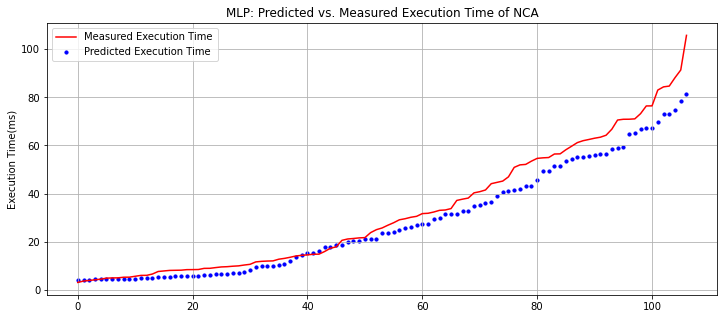

In [4]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt

train = pd.read_csv("training_data+valid_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default
range_neuron_first_layer =range(6,12,1)
range_neuron_second_layer =range(6,12,1)
start = time()
for num_neuron_first_layer, num_neuron_second_layer in product(range_neuron_first_layer,range_neuron_second_layer):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'relu', input_shape = x_train.shape[1:]),
                                 tf.keras.layers.Dense(num_neuron_second_layer, activation = 'sigmoid'),
                                tf.keras.layers.Dense(1)])

    model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')

    history = model.fit(x_train, y_train, epochs=200)

    y_valid_current = model.predict(x_valid)

    y_valid  = np.array(y_valid).reshape(-1,1)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid
    #print(per_err)

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    if ( MAPE < MAPE_better ):
        better_num_neuron_first_layer = num_neuron_first_layer
        better_num_neuron_second_layer = num_neuron_second_layer
        MAPE_better = MAPE
stop = time()
tunning_time = stop-start  
start = time()
model = tf.keras.Sequential([tf.keras.layers.Dense(better_num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(better_num_neuron_second_layer, activation = 'sigmoid'),
                            tf.keras.layers.Dense(1)])
model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
history = model.fit(x_train, y_train, epochs=200)
training_time = stop-start
y_pred = model.predict(x_valid)

y_test  = np.array(y_valid).reshape(-1,1)
per_err = (y_test - y_pred) / y_test
per_err = abs(per_err)*100
MAPE = sum(per_err)/len(per_err)

MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print(f"""MAPE of MLP  : {round(MAPE, 2)} 
lowest MAPE in training process:" ,{MAPE_better}
the number of neurons of fist layer : { better_num_neuron_first_layer }
the number of neurons of second layer : { better_num_neuron_second_layer }
Tunning time : {tunning_time}s,
Training time : {training_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)


plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("MLP: Predicted vs. Measured Execution Time of NCA")
plt.show()

# Random Forest (RF)

        
        The current MAPE of Random Forest  : 11.69, 
        the number of estimator :4
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.66, 
        the number of estimator :8
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.48, 
        the number of estimator :16
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.4, 
        the number of estimator :20
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.36, 
        the number of estimator :32
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.27, 
        the number of estimator :40
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 11.14, 
        the number of estimator :44
        min_samples_leaf : 1 

        
        
        The current MAPE of 

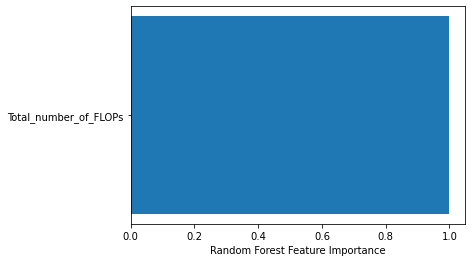

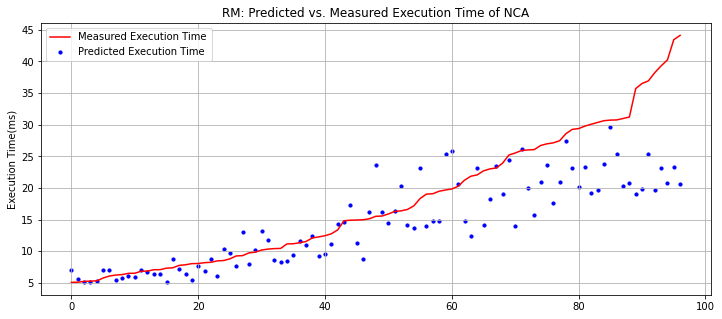

In [11]:
from time import time
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
from itertools import product
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model


train = pd.read_csv("training_data+valid_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']



# df = pd.read_csv("training_data.csv")
# train, valid = train_test_split(df, test_size=0.2)
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_train = train['Execution_time']

# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]] 
# y_test = df_pred['Execution_time']

MAPE_default=10000
MAPE_better=MAPE_default
start = time()

range_n_estimators =range(4,100,4)
range_min_samples_leaf =range(1,10,2)
start = time()
for value_n_estimators, value_min_samples_leaf in product(range_n_estimators, range_min_samples_leaf):
    # Initializing the Random Forest Regression model with 50 decision trees
    model = RandomForestRegressor(n_estimators = value_n_estimators, random_state = 0, max_features = "auto", min_samples_leaf = value_min_samples_leaf)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train) 

    # Predicting the target values of the validation set
    y_valid_current = model.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)


    if ( MAPE < MAPE_better ):
        better_n_estimators = value_n_estimators
        better_min_samples_leaf = value_min_samples_leaf
        MAPE_better = MAPE
        print(f'''        
        The current MAPE of Random Forest  : { round(MAPE, 2) }, 
        the number of estimator :{ better_n_estimators }
        min_samples_leaf : {better_min_samples_leaf} 

        ''')
stop = time()
tunning_time = stop-start  
start = time()        
# Initializing the Random Forest Regression model with 50 decision trees
model = RandomForestRegressor(n_estimators = better_n_estimators, random_state = 0, max_features = "auto", min_samples_leaf = better_min_samples_leaf)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
stop = time()
training_time = stop-start  
# Predicting the target values of the test set
start = time()  
y_pred = model.predict(x_test)
stop = time()
prediction_time = stop-start  

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
        
        
print(f'''        
The MAPE of Random Forest  : { round(MAPE, 2) }, 
the number of estimator :{ better_n_estimators }
min_samples_leaf : {better_min_samples_leaf} 
Tunning time : {tunning_time}s
Training time : {training_time}s
Prediction time : {prediction_time}s

''')
# plt.barh(x_train.columns, model.feature_importances_)
sorted_idx = model.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("RM: Predicted vs. Measured Execution Time of NCA")
plt.show()

# Support Vector Regression (SVR)

The lowest MAPE of SVR 20.734216423167926
The lowest MAPE of SVR 17.731760557948512
The lowest MAPE of SVR 17.701371602979556
The lowest MAPE of SVR 17.282794977047296
The lowest MAPE of SVR 17.07455344402728
The lowest MAPE of SVR 17.056200395221406
The lowest MAPE of SVR 17.018450892231396
The lowest MAPE of SVR 17.011658704433223
The lowest MAPE of SVR 16.991650819361592
The lowest MAPE of SVR 16.97663301084159
The lowest MAPE of SVR 16.969337127538584
The lowest MAPE of SVR 16.962787686202887
The lowest MAPE of SVR 16.882648771903717
The lowest MAPE of SVR 16.851241405799254
The lowest MAPE of SVR 16.817700619660425
The lowest MAPE of SVR 16.80635800843679
The lowest MAPE of SVR 16.766066441355683
The lowest MAPE of SVR 16.755084984904933
The lowest MAPE of SVR 16.737147428224713
The lowest MAPE of SVR 16.73264099109399
The lowest MAPE of SVR 16.723702950704077
The lowest MAPE of SVR 16.72345250759102
The lowest MAPE of SVR 16.719668836198835
The lowest MAPE of SVR 16.6915483050027

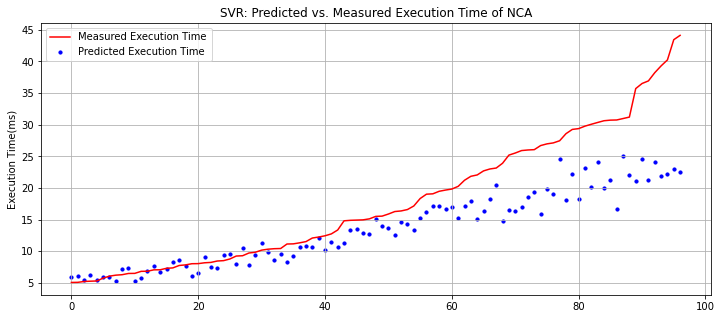

In [12]:
from time import time
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.model_selection import train_test_split
from itertools import product
# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline



train = pd.read_csv("training_data+valid_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']
# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


# ----------- Model fitting -----------

# model1 = LinearRegression()
# lr = model1.fit(x_train, y_train)
MAPE_default=10000
MAPE_better=MAPE_default
range_C =range(1,100,4)
range_epsilon =np.arange(0.01,0.3,0.04)
start = time()
for value_C, value_epsilon in product(range_C,range_epsilon):
    
    model2 = SVR(kernel='rbf', C=value_C, epsilon=value_epsilon) # set kernel and hyperparameters
    
    svr = model2.fit(x_train, y_train)

    # Predicting the target values of the test set
    y_valid_current = model2.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of Random Forest  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_C = value_C
        better_epsilon = value_epsilon
        MAPE_better = MAPE
        print("The lowest MAPE of SVR",MAPE_better)
        
stop = time()
tunning_time = stop-start  
start = time()
model2 = SVR(kernel='rbf', C=better_C, epsilon=better_epsilon) # set kernel and hyperparameters

svr = model2.fit(x_train, y_train)

stop = time()
training_time = stop-start  

# Predicting the target values of the test set
start = time()
y_pred = model2.predict(x_test)
stop = time()
prediction_time = stop-start  
# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
             
print(f'''        
The MAPE of SVR  : { round(MAPE, 2) }, the value of hyperparameters :C = {better_C}, epsilon = {better_epsilon},
Tunning time : {tunning_time}s,
Training time : {training_time}s
Prediction time : {prediction_time}s
''')


index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("SVR: Predicted vs. Measured Execution Time of NCA")
plt.show()


# plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original y")
# plt.scatter(np.arange(len(y_lr)),y_lr[index],s=3,c="b",label="prediction")
# plt.legend(loc="upper left")
# plt.grid()
# plt.xlabel("index")
# plt.ylabel("y")
# plt.title(":")
# plt.show()

# eXtreme Gradient Boosting (XGBoost)

        
        The lowest MAPE of XGBoost  : 11.04
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 11
        n_estimators = 54

        
        
        The lowest MAPE of XGBoost  : 10.9
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 11
        n_estimators = 58

        
        
        The lowest MAPE of XGBoost  : 10.44
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.15000000000000002
        max_depth = 11
        n_estimators = 54

        
        
        The lowest MAPE of XGBoost  : 10.11
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.15000000000000002
        max_depth = 11
        n_estimators = 58

        
        
        The lowest MAPE of XGBoost  : 9.87
        the value of hyperparameters :
        colsample_bytree = 0.5
       

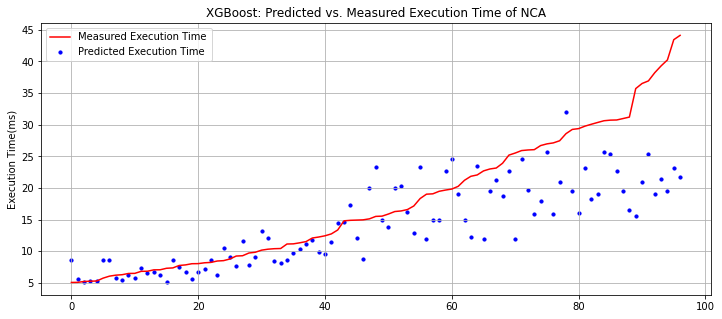

In [1]:
from time import time
import xgboost as xgb
import pandas as pd # for data manipulation
from itertools import product
from sklearn.model_selection import train_test_split
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline



train = pd.read_csv("training_data+valid_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCA.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCA.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']

MAPE_default=10000
MAPE_better=MAPE_default
range_colsample_bytree = np.arange(0.5,0.9,0.1)
range_learning_rate = np.arange(0.1,0.26,0.05)
range_max_depth = range(3,12,1)
range_n_estimators = range(2,60,4)
start = time()
for value_colsample_bytree, value_learning_rate, value_max_depth, value_n_estimators in product(range_colsample_bytree,range_learning_rate,range_max_depth,range_n_estimators):


    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = value_colsample_bytree, learning_rate =value_learning_rate,
                    max_depth = value_max_depth, n_estimators = value_n_estimators)
    xg_reg.fit(x_train,y_train)

    y_valid_current = xg_reg.predict(x_valid)
    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100


    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)


    if ( MAPE < MAPE_better ):
        better_colsample_bytree = value_colsample_bytree
        better_learning_rate = value_learning_rate
        better_max_depth = value_max_depth
        better_n_estimators = value_n_estimators
        MAPE_better = MAPE

                
        print(f'''        
        The lowest MAPE of XGBoost  : { round(MAPE_better, 2) }
        the value of hyperparameters :
        colsample_bytree = {better_colsample_bytree}
        learning_rate = {better_learning_rate}
        max_depth = {better_max_depth}
        n_estimators = {better_n_estimators}

        ''')
stop = time()
tunning_time = stop-start  
start = time()        
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = better_colsample_bytree, learning_rate =better_learning_rate,
                max_depth = better_max_depth, n_estimators = better_n_estimators)
xg_reg.fit(x_train,y_train)
stop = time()
training_time = stop-start 
start = time() 
y_pred = xg_reg.predict(x_test)
stop = time()
prediction_time = stop-start 
# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100


# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)
print(f'''        
The MAPE of XGBoost  : { round(MAPE, 2) }
the value of hyperparameters :
colsample_bytree = {better_colsample_bytree}
learning_rate = {better_learning_rate}
max_depth = {better_max_depth}
n_estimators = {better_n_estimators}
Tunning time : {tunning_time}s,
Training time : {training_time}s
Prediction time : {prediction_time}s
''')
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("XGBoost: Predicted vs. Measured Execution Time of NCA")
plt.show()